In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json

In [20]:
FILE = './Chrome/BrowserHistory.json'
with open(FILE) as f:
    data = json.load(f)
sites = data['Browser History']
sites

[{'favicon_url': 'https://www.google.com/favicon.ico',
  'page_transition': 'LINK',
  'title': 'Google Takeout',
  'url': 'https://takeout.google.com/?hl=en&pli=1',
  'client_id': 'rzcxMfNwdcO1ux8+dWBKKw==',
  'time_usec': 1645774571678768},
 {'favicon_url': 'https://www.google.com/favicon.ico',
  'page_transition': 'LINK',
  'title': 'Google Takeout',
  'url': 'https://takeout.google.com/?hl=en&pli=1',
  'client_id': 'rzcxMfNwdcO1ux8+dWBKKw==',
  'time_usec': 1645774566107956},
 {'favicon_url': 'https://www.google.com/favicon.ico',
  'page_transition': 'LINK',
  'title': 'Google Takeout',
  'url': 'https://takeout.google.com/?hl=en&pli=1',
  'client_id': 'rzcxMfNwdcO1ux8+dWBKKw==',
  'time_usec': 1645774549148652},
 {'favicon_url': 'https://www.google.com/favicon.ico',
  'page_transition': 'LINK',
  'title': 'Google Takeout',
  'url': 'https://takeout.google.com/?hl=en&pli=1',
  'client_id': 'rzcxMfNwdcO1ux8+dWBKKw==',
  'time_usec': 1645774534222996},
 {'favicon_url': 'https://www.go

In [118]:
# Take out only the LINK, not transitions
# get the title & time
links = []
titles = []
times = []
for site in sites:
    if (site['page_transition'] == 'LINK') and (site['title'] != ''):
        title = site['title'].replace('\"', '')
        time = site['time_usec']
        titles.append(title)
        times.append(time)

links_df = pd.DataFrame({'title': titles, 'time': times})

(array([429., 584., 509., 417., 366., 372., 506., 272., 349., 270., 262.,
        194., 282., 282., 125., 335., 237., 242., 276., 321.,  95., 208.,
        548., 277., 232., 342., 291., 127., 281., 109., 199.,  79., 167.,
        130., 320., 303., 137., 238., 216., 129., 236., 154., 457., 267.,
        254., 190., 117., 320., 277.,  73., 169., 266., 111., 247., 211.,
        197., 112.,  62., 140., 110., 131., 200.,  60., 212., 137.,  91.,
         99., 369., 100., 115., 161.,  63., 116., 232., 262.,  67.,  76.,
        123.,  83.,  91., 149., 112., 143., 114., 230., 285., 170., 260.,
        230.,  86., 341., 151., 120., 205., 210.,  95., 196., 228., 181.,
        232.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.

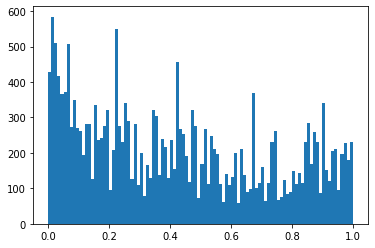

In [60]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
plt.hist(scaler.fit_transform(np.array(links_df['time']).reshape(-1, 1)), bins = 100)



In [119]:
n = len(titles)
query = ""
assert n==len(times)
for i in range(n):
    node = f"MERGE ( node_{i}:Site " + "{name:\""+ f"{titles[i]}"+"\", time:"+f"{times[i]}"+"})"
    query += node + "\n"

In [120]:
for i in range(n-1):
    link = f"MERGE ( node_{i})-[:VISITED " + "{time:"+f"{times[i]}"+"}]->("+"node_"+ f"{i+1})"
    query += link + "\n"


In [121]:
print(query)

MERGE ( node_0:Site {name:"Google Takeout", time:1645774571678768})
MERGE ( node_1:Site {name:"Google Takeout", time:1645774566107956})
MERGE ( node_2:Site {name:"Google Takeout", time:1645774549148652})
MERGE ( node_3:Site {name:"Google Takeout", time:1645774534222996})
MERGE ( node_4:Site {name:"Google Takeout", time:1645774528793796})
MERGE ( node_5:Site {name:"Google Takeout", time:1645774515129061})
MERGE ( node_6:Site {name:"Google Takeout", time:1645774398958273})
MERGE ( node_7:Site {name:"Google Takeout", time:1645774387743647})
MERGE ( node_8:Site {name:"Google Takeout", time:1645774307074710})
MERGE ( node_9:Site {name:"Data & privacy", time:1645774269897415})
MERGE ( node_10:Site {name:"Google Account", time:1645774266300755})
MERGE ( node_11:Site {name:"Data Sets | GraphChallenge", time:1645774156577952})
MERGE ( node_12:Site {name:"authorization - How to configure user and password for neo4j cluster without REST API - Stack Overflow", time:1645772994090612})
MERGE ( node_

In [122]:
with open("query.cypher", "w") as f:
    f.write(query)

In [117]:
os.getcwd()

'/Users/itsukiogihara/Projects/NLP'

In [ ]:
up